In [1]:
import random
import torch
import matplotlib.pyplot as plt
import numpy as np

from Visualizations import SentinelVisualization
from models.PansharpeningUnetppLightning import PanSharpenUnetppLightning, denormalize, normalize
from SentinelData import SentinelCroppedDataset, SentinelDataset
from InteractiveVisualizations import InteractiveBandViewer

visualization = SentinelVisualization("./dataset_sentinel", dataset= SentinelDataset("./dataset_sentinel"))

# Testing & Profiling

In [2]:
# import cProfile
# from SentinelData import SentinelCroppedDataset

# def profile_dataloader(n_batches=50):
#     dataset = SentinelCroppedDataset("./dataset_sentinel")
#     dataloaders = dataset.produce_dataloaders() #train, val, test
#     for i, batch in enumerate(dataloaders[0]):
#         print(f"Batch {i} done")
#         if i >= n_batches:
#             break


# %prun -D dataloader.prof profile_dataloader()

# if __name__ == "__main__":
#     profiler = cProfile.Profile()
#     profiler.enable()

#     profile_dataloader()

#     profiler.disable()
#     profiler.dump_stats("dataloader.prof")

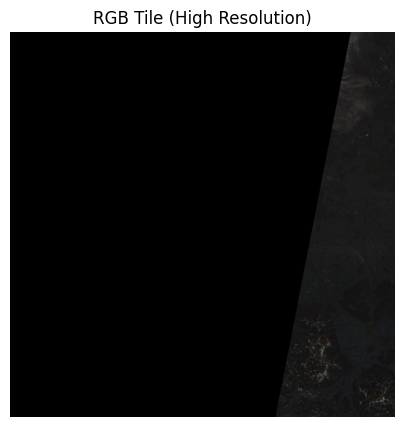

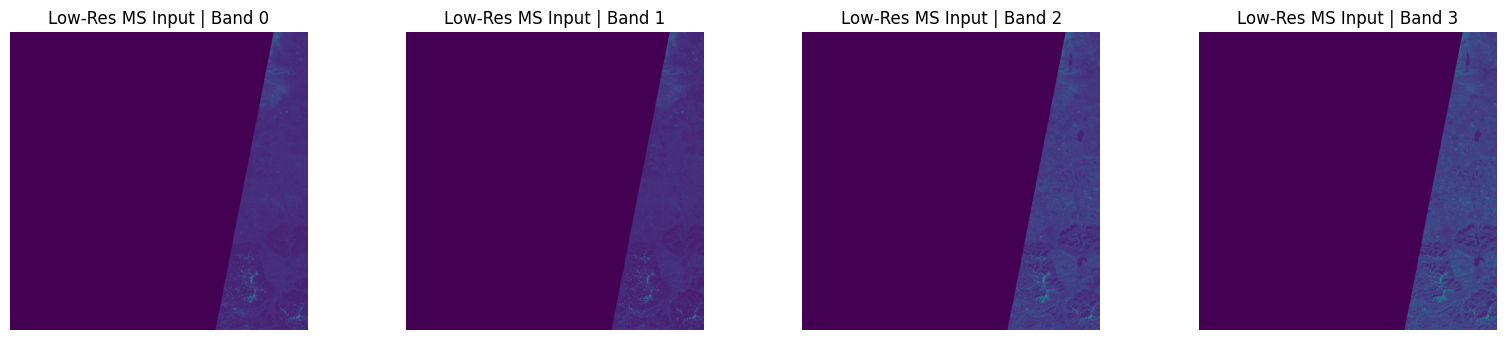

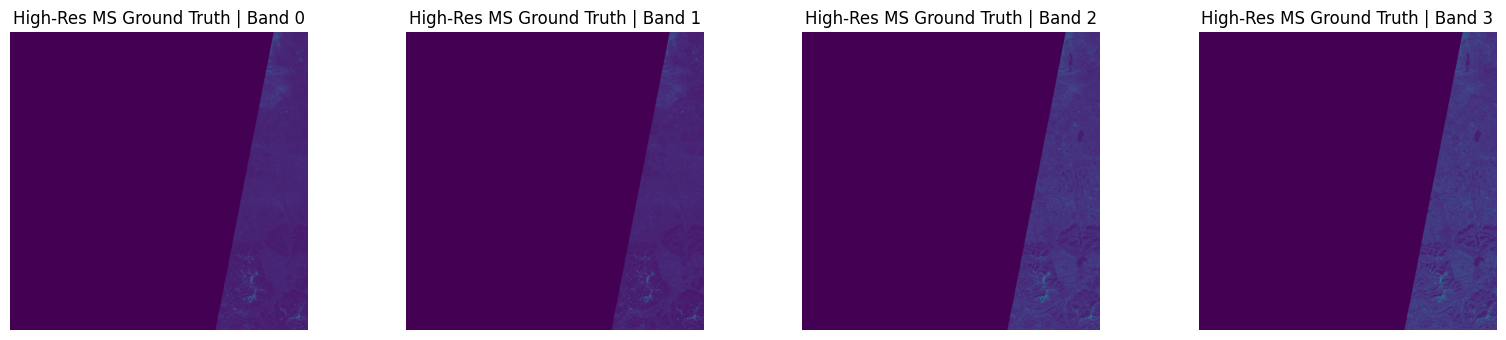

Displayed valid sample from val loader.


In [3]:
visualization.visualize_one_sample(
        loader_type="val",    # or "val" or "test"
    )

In [4]:
# model = PanSharpenUnetppLightning.load_from_checkpoint("./lightning_logs/version_27/checkpoints/PanSharpenUnetppLightningTraining-drop-0.5-epoch=249-val_l1=0.0010.ckpt")


# visualization.plot_pansharpen_bands(
#     model=model,
#     num_samples=5,
# )

In [5]:
dataset = SentinelDataset("./dataset_sentinel")
train_loader, val_loader, test_loader = dataset.produce_dataloaders(batch_size=32)
(rgb, ms_lr), ms_hr = next(iter(test_loader))
model = PanSharpenUnetppLightning.load_from_checkpoint("./lightning_logs/version_27/checkpoints/PanSharpenUnetppLightningTraining-drop-0.5-epoch=249-val_l1=0.0010.ckpt")
device = next(model.parameters()).device



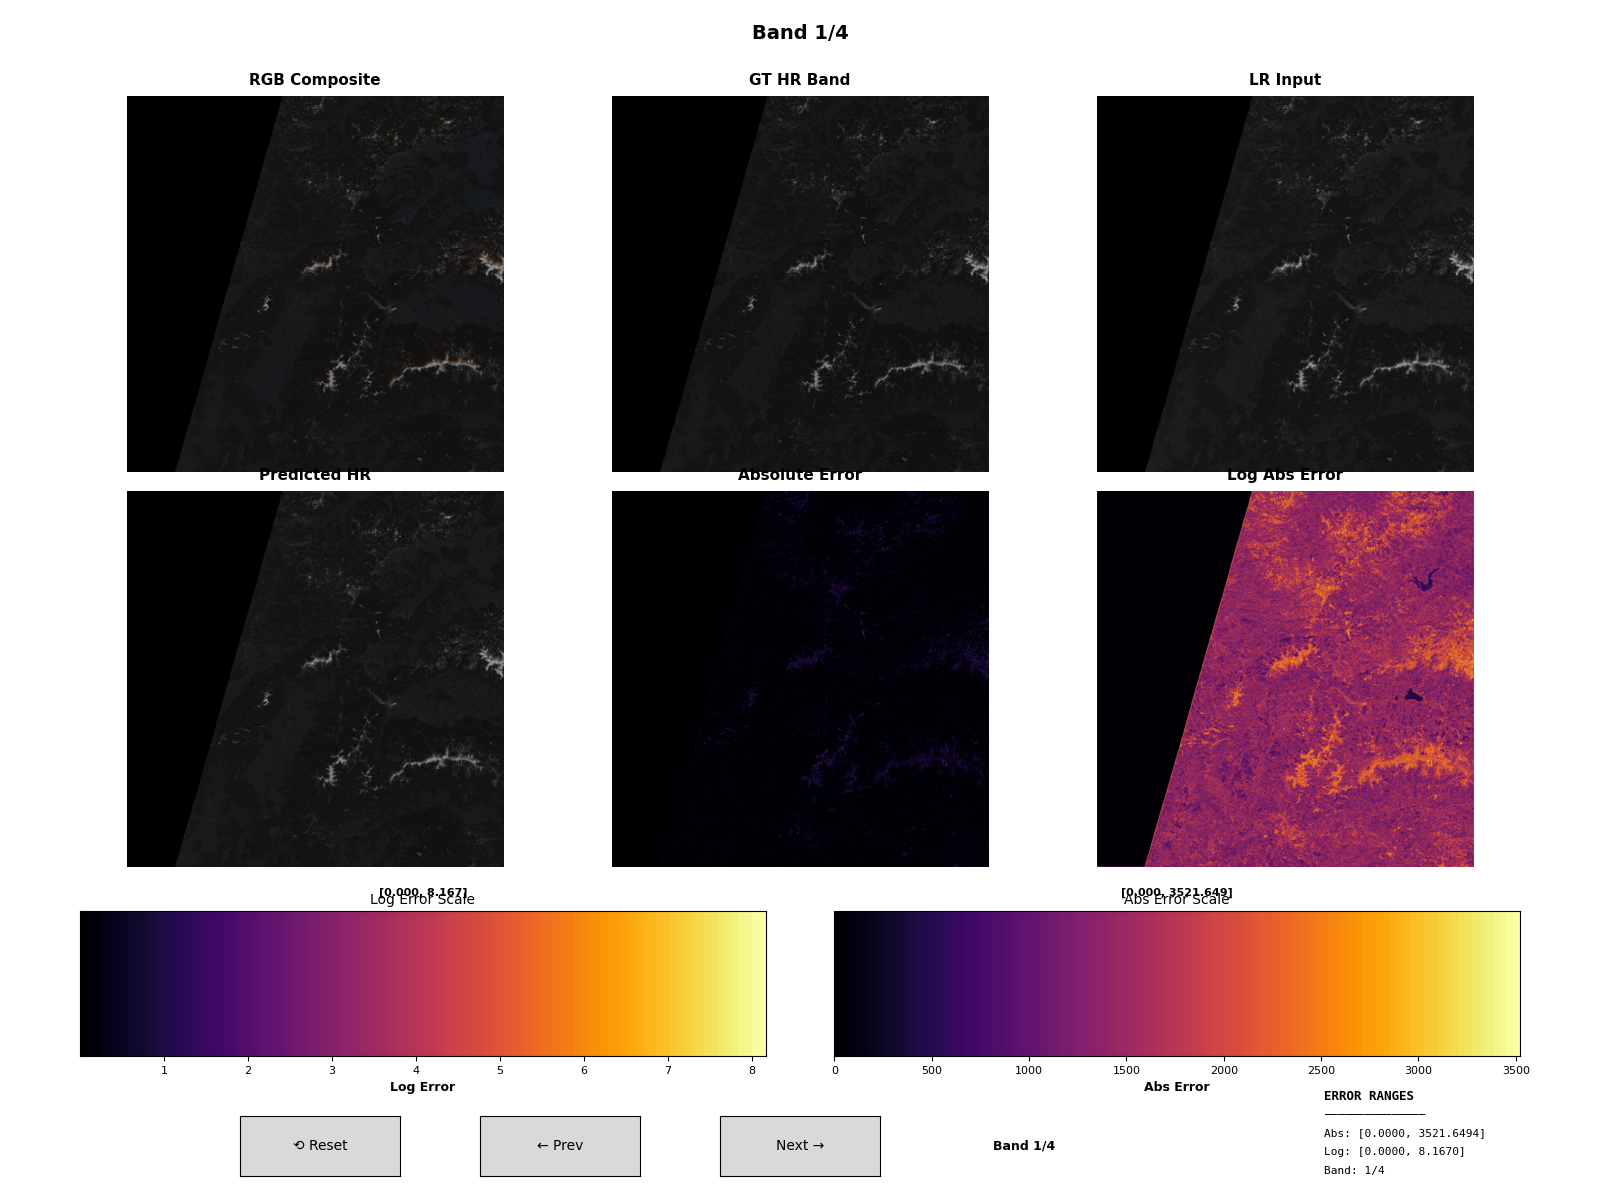

In [6]:
%matplotlib widget
(rgb, ms_lr), ms_hr = next(iter(train_loader))
with torch.no_grad():
    pred = denormalize(model(rgb.to(device), ms_lr.to(device))).cpu()


idx = 0  # choose sample
viewer = InteractiveBandViewer(
    ms_gt=ms_hr[idx],
    ms_pred=pred[idx],
    pan=rgb[idx],
    lr=ms_lr[idx],
    figsize=(16, 12)
)